## Import Statements

In [654]:
import pandas as pd
import numpy as np
import wptools
import os
import requests
from PIL import Image
from io import BytesIO

In [655]:
# import matplotlib, seaborn
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.25)
%matplotlib inline

# Gathering Data

### The WeRateDogs Twitter Archive (provided)

In [593]:
df = pd.read_csv("twitter-archive-enhanced.csv")

In [594]:
df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [595]:
df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [596]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

### Tweets from Twitter API

#### Loading the data from the provided file "tweet-json.txt" as the request was failing from my end and wasn't able to get the data from the API

In [597]:
import json

tweets = []
for line in open('tweet-json.txt', 'r'):
    tweets.append(json.loads(line))

In [598]:
tweets = pd.DataFrame(tweets)

In [599]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [600]:
tweets.head(3)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [601]:
# selecting the important columns
tweets[["id", "retweet_count", "favorite_count","user"]]

,id,retweet_count,favorite_count,user
0,892420643555336193,8853,39467,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,892177421306343426,6514,33819,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,891815181378084864,4328,25461,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,891689557279858688,8964,42908,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,891327558926688256,9774,41048,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
5,891087950875897856,3261,20562,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
6,890971913173991426,2158,12041,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
7,890729181411237888,16716,56848,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
8,890609185150312448,4429,28226,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
9,890240255349198849,7711,32467,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [602]:
# Moving the 3 columns into a separate variable
tweet_df = tweets[['id','retweet_count','favorite_count','user']]
tweet_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
user              2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [603]:
tweet_df.shape

(2354, 4)

### The Image Prediction data

#### Loading the data from the provided file "tweet-json.txt" as the request was failing from my end and wasn't able to get the data from the API

In [604]:
tsvData = pd.read_csv("image-predictions-3.tsv",delimiter = '\t')

In [605]:
tsvData.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [606]:
tsvData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [607]:
tsvData.shape

(2075, 12)

## Exploring the Gathered Data

#### Exploring Twitter Archive data

In [608]:
df.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [609]:
df.doggo.unique()

array(['None', 'doggo'], dtype=object)

In [610]:
df.tweet_id.nunique()

2356

In [611]:
df.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

In [612]:
df.text.unique()
df.text

0       This is Phineas. He's a mystical boy. Only eve...
1       This is Tilly. She's just checking pup on you....
2       This is Archie. He is a rare Norwegian Pouncin...
3       This is Darla. She commenced a snooze mid meal...
4       This is Franklin. He would like you to stop ca...
5       Here we have a majestic great white breaching ...
6       Meet Jax. He enjoys ice cream so much he gets ...
7       When you watch your owner call another dog a g...
8       This is Zoey. She doesn't want to be one of th...
9       This is Cassie. She is a college pup. Studying...
10      This is Koda. He is a South Australian decksha...
11      This is Bruno. He is a service shark. Only get...
12      Here's a puppo that seems to be on the fence a...
13      This is Ted. He does his best. Sometimes that'...
14      This is Stuart. He's sporting his favorite fan...
15      This is Oliver. You're witnessing one of his m...
16      This is Jim. He found a fren. Taught him how t...
17      This i

In [613]:
df.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [614]:
df.name.value_counts()

None        745
a            55
Charlie      12
Oliver       11
Lucy         11
Cooper       11
Penny        10
Tucker       10
Lola         10
Winston       9
Bo            9
Sadie         8
the           8
Bailey        7
Buddy         7
an            7
Daisy         7
Toby          7
Jack          6
Milo          6
Dave          6
Scout         6
Stanley       6
Koda          6
Rusty         6
Leo           6
Jax           6
Bella         6
Oscar         6
Bentley       5
           ... 
Snoopy        1
Skittles      1
Butters       1
Augie         1
Einstein      1
Edgar         1
Sage          1
Oddie         1
Tayzie        1
Hall          1
Durg          1
Linus         1
Filup         1
Kloey         1
Pip           1
Ashleigh      1
Kellogg       1
Randall       1
Ralphé        1
Berb          1
Alfy          1
Fwed          1
Aiden         1
Zooey         1
Ralpher       1
Cecil         1
Billl         1
Hero          1
Rinna         1
Saydee        1
Name: name, Length: 957,

In [615]:
# Getting all the values of text lines that contain &amp;
df.text[df.text.str.contains('&amp;')]

262     Meet Indie. She's not a fan of baths but she's...
273     RT @dog_rates: This is Pipsy. He is a fluffbal...
320     Meet Chester (bottom) &amp; Harold (top). They...
461     Say hello to Eugene &amp; Patti Melt. No matte...
485     RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...
516     Meet Sam. She smiles 24/7 &amp; secretly aspir...
799     Meet Roosevelt. He's preparing for takeoff. Ma...
889     Meet Maggie &amp; Lila. Maggie is the doggo, L...
898     This is Lilli Bee &amp; Honey Bear. Unfortunat...
976     Meet Jax &amp; Jil. Jil is yelling the pledge ...
1104    Meet Buckley. His family &amp; some neighbors ...
1179    Meet Sid &amp; Murphy. Murphy floats alongside...
1199    Meet Jennifur. She's supposed to be navigating...
1222    Meet Travis and Flurp. Travis is pretty chill ...
1274    From left to right:\nCletus, Jerome, Alejandro...
1366    Meet Rambo &amp; Kiwi. Rambo's the pup with th...
1421    Meet Beau &amp; Wilbur. Wilbur stole Beau's be...
1465    Meet O

#### Exploring the Image Data

In [616]:
# Explore the data for more details
tsvData.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
German_shepherd               20
Siberian_husky                20
web_site                      19
Cardigan                      19
Eskimo_dog                    18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Maltese_dog                   18
Lakeland_terrier              17
Shih-Tzu                      17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [617]:
tsvData.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
Chesapeake_Bay_retriever           41
French_bulldog                     41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
collie                             27
Eskimo_dog                         27
Pembroke                           27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
toy_terrier                        20
miniature_pinscher                 20
malinois                           20
Samoyed                            20
chow                               20
Boston_bull                        19
Norwegian_elkhound                 19
Staffordshir

# Quality and Tidiness Issues

**Quality issues:**

1) Convert tweet_id column to a string in archive dataframe, df

2) Replace "& amp;" in text column of archive dataframe, df , with just "and"

3) Capitalize the First letter of p1,p2 and p3 columns and remove "_" from their values of image dataframe, tsvData

4) Remove columns that contain no information

5) Convert id column to string in tweet_df dataframe

6) Few name records in Archive dataframe, df,  contain articles (the, an, a) instead of actual names. Remove them for consistency. (Replace them with NaN)

7) Rename column in tweet_df  "id" column name to "tweet_id" to merge it with the other 2 dataframes

8) Convert tweet_id to a string in image dataframe, tsvData

9) The ratings are inconsitent 

**Tidiness Issues:**

1) Convert timestamp from string to datetime in the archive dataframe, df

2) Combine Dog Stages into one single column instead of multiple columns of that data

# Cleaning the Data

In [618]:
# Creating copies of the dataframe to clean

df_clean = df.copy()
tsvData_clean = tsvData.copy()
tweet_df_clean = tweet_df.copy()

In [619]:
# Summary of all of the copied dataframes

print("*" * 70)
df_clean.info()
print("*" * 70)
tsvData_clean.info()
print("*" * 70)
tweet_df_clean.info()
print("*" * 70)

**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo       

### Quality issue 1:
Convert tweet_id column to a string in archive dataframe, df

In [620]:
df_clean['tweet_id'] = df_clean['tweet_id'].astype(str)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

### Quality issue 2:
Replace '& amp;' in text column of archive dataframe, df, with just "and"

In [621]:
df_clean['text'] = df_clean['text'].str.replace('&amp;','and')

# verifying if there are still such values in text column 
df_clean.text[df_clean.text.str.contains('&amp;')]

Series([], Name: text, dtype: object)

### Quality Issue 3: 
Capitalize the First letter of p1,p2 and p3 columns and remove "_" from their values of image dataframe, tsvData

In [622]:
tsvData_clean['p1'] = tsvData_clean['p1'].str.replace('_', ' ').str.title()
tsvData_clean['p2'] = tsvData_clean['p2'].str.replace('_', ' ').str.title()
tsvData_clean['p3'] = tsvData_clean['p3'].str.replace('_', ' ').str.title()

In [623]:
tsvData_clean.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True


### Quality Issue 4:
Remove columns that contain no information

In [624]:
df_clean = df_clean.drop(["retweeted_status_id", "retweeted_status_user_id", "retweeted_status_timestamp", 
            'in_reply_to_status_id', 'in_reply_to_user_id'], axis=1)

### Quality Issue 5:
Convert id column to string in tweet_df dataframe

In [625]:
tweet_df_clean['id'] = tweet_df_clean['id'].astype(str)
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                2354 non-null object
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
user              2354 non-null object
dtypes: int64(2), object(2)
memory usage: 73.6+ KB


### Quality Issue 6:
Few name records in Archive dataframe, df, contain articles (the, an, a) instead of actual names. Remove them for consistency. (Replace them with NaN)

In [626]:
df_clean['name'] = df_clean['name'].replace(['a', 'an', 'the'], np.nan)

In [627]:
df_clean['name'] = df_clean['name'].replace('None', np.nan)

In [628]:
# test
assert sum(df_clean['name'] == 'None') + sum(df_clean['name'] == 'a') + sum(df_clean['name'] == 'an') + sum(df_clean['name'] == 'a') == 0



### Quality Issue 7:
Rename column in tweet_df "id" column name to "tweet_id" to merge it with the other 2 dataframes

In [629]:
tweet_df_clean.rename(columns={'id': 'tweet_id'}, inplace=True)
tweet_df_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'user'], dtype='object')

### Quality Issue 8:
Convert tweet_id to a string in image dataframe, tsvData

In [630]:
tsvData_clean['tweet_id'] = tsvData_clean['tweet_id'].astype(str)
tsvData_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null object
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


### Quality Issue 9:
The ratings are inconsitent

#### Description : 

Rating denominators are inconsistent and some rating numerators are relatively high

#### Solution : 

Some of the dog ratings are exaggerated, eg. 1776/10, since rating are usually between 10/10 and 15/10. We will drop these rows and they will be excluded from the analysis.


Then some of the ratings have denominators other than the usual "10". This can be the case for a group of dogs (e.g. a group of 5 dogs with 11/10 rating each would result in a 55/50 rating). If this is the case, then ratings should be standardized to a denom of "10".

In [631]:
# standardizing to a denominator of 10 for groups of dogs:
df_clean = df_clean[df_clean['rating_denominator'] > 0]

df_clean['rating_n'] = [int(round(num/(denom/10)))  if denom != 10 and num/denom <= 2 
                           else num for num, denom in zip(df_clean['rating_numerator'], df_clean['rating_denominator'])]
df_clean['rating_d'] = [10 if denom != 10 and num/denom <= 2
                             else denom for num, denom in zip(df_clean['rating_numerator'], df_clean['rating_denominator'])]
# drop other columns
df_clean = df_clean.drop(['rating_numerator', 'rating_denominator'], axis=1)



In [632]:
df_clean['rating_n'].unique(),df_clean['rating_d'].unique()

(array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
         182,    0,   75,    7,    9,   24,    8,    1,   27,    3,    4,
        1776,    2,   26]), array([10,  7]))

In [633]:
df_clean = df_clean.drop(df_clean[((df_clean['rating_d'] != 10) | (df_clean['rating_n'] > 20))].index)
df_clean['rating_n'].unique(),df_clean['rating_d'].unique()

(array([13, 12, 14,  5, 17, 11, 10,  6, 15,  0,  7,  9,  8,  1,  3,  4,  2]),
 array([10]))

### Tidiness Issue 1:
Convert timestamp from string to datetime

In [634]:
df_clean['timestamp'] =  pd.to_datetime(df_clean['timestamp'], infer_datetime_format=True)
df_clean.timestamp

0      2017-08-01 16:23:56
1      2017-08-01 00:17:27
2      2017-07-31 00:18:03
3      2017-07-30 15:58:51
4      2017-07-29 16:00:24
5      2017-07-29 00:08:17
6      2017-07-28 16:27:12
7      2017-07-28 00:22:40
8      2017-07-27 16:25:51
9      2017-07-26 15:59:51
10     2017-07-26 00:31:25
11     2017-07-25 16:11:53
12     2017-07-25 01:55:32
13     2017-07-25 00:10:02
14     2017-07-24 17:02:04
15     2017-07-24 00:19:32
16     2017-07-23 00:22:39
17     2017-07-22 16:56:37
18     2017-07-22 00:23:06
19     2017-07-21 01:02:36
20     2017-07-20 16:49:33
21     2017-07-19 16:06:48
22     2017-07-19 03:39:09
23     2017-07-19 00:47:34
24     2017-07-18 16:08:03
25     2017-07-18 00:07:08
26     2017-07-17 16:17:36
27     2017-07-16 23:58:41
28     2017-07-16 20:14:00
29     2017-07-15 23:25:31
               ...        
2326   2015-11-17 00:24:19
2327   2015-11-17 00:06:54
2328   2015-11-16 23:23:41
2329   2015-11-16 21:54:18
2330   2015-11-16 21:10:36
2331   2015-11-16 20:32:58
2

In [635]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2345 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id         2345 non-null object
timestamp        2345 non-null datetime64[ns]
source           2345 non-null object
text             2345 non-null object
expanded_urls    2290 non-null object
name             1536 non-null object
doggo            2345 non-null object
floofer          2345 non-null object
pupper           2345 non-null object
puppo            2345 non-null object
rating_n         2345 non-null int64
rating_d         2345 non-null int64
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 238.2+ KB


### Tidiness Issue 2:
Combine Dog Stages into one single column instead of multiple columns of that data

In [636]:
df_clean['dog_stage'] = df[['doggo', 'floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)
df_clean.dog_stage.value_counts()

NoneNoneNoneNone        1966
NoneNonepupperNone       244
doggoNoneNoneNone         83
NoneNoneNonepuppo         29
doggoNonepupperNone       12
NoneflooferNoneNone        9
doggoflooferNoneNone       1
doggoNoneNonepuppo         1
Name: dog_stage, dtype: int64

In [637]:
df_clean['dog_stage'].replace("NoneNoneNoneNone","None", inplace=True)
df_clean['dog_stage'].replace("doggoNoneNoneNone","doggo", inplace=True)
df_clean['dog_stage'].replace("NoneflooferNoneNone","floofer", inplace=True)
df_clean['dog_stage'].replace("NoneNonepupperNone","pupper", inplace=True)
df_clean['dog_stage'].replace("NoneNoneNonepuppo","puppo", inplace=True)
df_clean.dog_stage.value_counts()

None                    1966
pupper                   244
doggo                     83
puppo                     29
doggoNonepupperNone       12
floofer                    9
doggoNoneNonepuppo         1
doggoflooferNoneNone       1
Name: dog_stage, dtype: int64

In [638]:
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'doggo', 'floofer', 'pupper', 'puppo', 'rating_n', 'rating_d',
       'dog_stage'],
      dtype='object')

In [639]:
col = ['doggo', 'floofer','pupper', 'puppo']
df_clean.drop(col,axis=1,inplace=True)
df_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls', 'name',
       'rating_n', 'rating_d', 'dog_stage'],
      dtype='object')

## Merging the DataSets and Cleaning

In [640]:
# Merging all three dataframes
tweet_merge_clean = pd.merge(tweet_df_clean, df_clean, on='tweet_id', how='outer')
tweet_merge_clean = pd.merge(tweet_merge_clean, tsvData_clean, on='tweet_id', how='outer')
tweet_merge_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 23 columns):
tweet_id          2356 non-null object
retweet_count     2354 non-null float64
favorite_count    2354 non-null float64
user              2354 non-null object
timestamp         2345 non-null datetime64[ns]
source            2345 non-null object
text              2345 non-null object
expanded_urls     2290 non-null object
name              1536 non-null object
rating_n          2345 non-null float64
rating_d          2345 non-null float64
dog_stage         2345 non-null object
jpg_url           2075 non-null object
img_num           2075 non-null float64
p1                2075 non-null object
p1_conf           2075 non-null float64
p1_dog            2075 non-null object
p2                2075 non-null object
p2_conf           2075 non-null float64
p2_dog            2075 non-null object
p3                2075 non-null object
p3_conf           2075 non-null float64
p3_dog            2

In [641]:
tweet_merge_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'user', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'rating_n', 'rating_d',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

### Create a dog breed column with the available data

In [642]:
# Creates a predicted dog breed column, based on the the confidence level of minimum 30% and 'is dog' statements
tweet_merge_clean['breed_pred'] = [i['p1'] if i['p1_dog'] == True and i['p1_conf'] > 0.3 
                     else i['p2'] if i['p2_dog'] == True and i['p2_conf'] > 0.3
                     else i['p3'] if i['p3_dog'] == True and i['p3_conf'] > 0.3
                     else np.nan for index, i in tweet_merge_clean.iterrows()]

# Storing Data For this project

In [656]:
tweet_merge_clean.to_csv('twitter_archive_master.csv')

In [657]:
tweet_merge_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'user', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'rating_n', 'rating_d',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed_pred'],
      dtype='object')

# Analysis

## EDA

1) Top 10 breeds in the data

2) Top 10 names of Dogs

In [645]:
# The top 10 dog breeds in the dataset
tweet_merge_clean['breed_pred'].value_counts()[:10]

Golden Retriever      138
Labrador Retriever     93
Pembroke               85
Chihuahua              69
Pug                    53
Samoyed                40
Pomeranian             36
Toy Poodle             36
Chow                   35
Malamute               28
Name: breed_pred, dtype: int64

In [646]:
# The top 10 dog names in the dataset
tweet_merge_clean['name'].value_counts()[:10]

Charlie    12
Lucy       11
Oliver     11
Cooper     11
Tucker     10
Lola       10
Penny      10
Winston     9
Bo          9
Sadie       8
Name: name, dtype: int64

In [647]:
tweet_merge_clean.columns

Index(['tweet_id', 'retweet_count', 'favorite_count', 'user', 'timestamp',
       'source', 'text', 'expanded_urls', 'name', 'rating_n', 'rating_d',
       'dog_stage', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'breed_pred'],
      dtype='object')

In [648]:
# Descriptive information about the dog's ratings from the dataset
tweet_merge_clean['rating_n'].describe()

count    2345.000000
mean       10.693390
std         2.194135
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        17.000000
Name: rating_n, dtype: float64

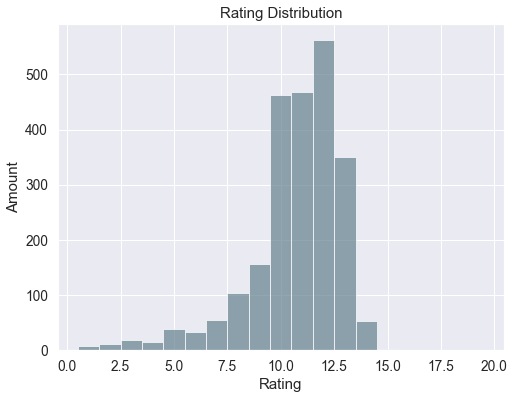

In [649]:
# Distribution of ratings through histogram
plt.figure(figsize=[8,6])
plt.hist(tweet_merge_clean['rating_n'], bins=np.arange(0.5, 20, 1), alpha=0.7, color='#64818e')
plt.xlabel('Rating')
plt.ylabel('Amount')
plt.title('Rating Distribution');

## EDA Conclusion

The top 3 dog breeds, by count, in this dataset are **Golden Retrievers**, **Labrador Retrievers** and **Pembroke Corgis**, while **Charlie** and **Lucy** being the most represented dog names with 12 and 11 dog names each. The rating distribution is left-skewed with a median rating of 11 and an average rating of 10.693390

# Questions

1) Which dog breed recieved the highest ratings on average?

2) Which dog breed recieved the highest favorite count on average?

#### Q1 : Which dog breed recieved the highest ratings on average?

In [650]:
# groups the dataset by dog breeds and computes the average rating for each group
breed = tweet_merge_clean.groupby('breed_pred')['rating_n'].mean()

# filter out dog breed that appear 0 times
breed = breed[tweet_merge_clean['breed_pred'].value_counts() > 0].sort_values(ascending=False)
breed

breed_pred
Afghan Hound                   13.000000
Saluki                         12.500000
Tibetan Mastiff                12.400000
Briard                         12.333333
Eskimo Dog                     12.071429
Gordon Setter                  12.000000
Silky Terrier                  12.000000
Standard Schnauzer             12.000000
Border Terrier                 12.000000
Toy Terrier                    12.000000
Irish Setter                   11.833333
Samoyed                        11.675000
Chow                           11.657143
Great Pyrenees                 11.615385
Standard Poodle                11.600000
Golden Retriever               11.569343
Cardigan                       11.529412
Giant Schnauzer                11.500000
Pembroke                       11.435294
Norwegian Elkhound             11.428571
Cocker Spaniel                 11.333333
Greater Swiss Mountain Dog     11.333333
Leonberg                       11.333333
Old English Sheepdog           11.300000
Blenh

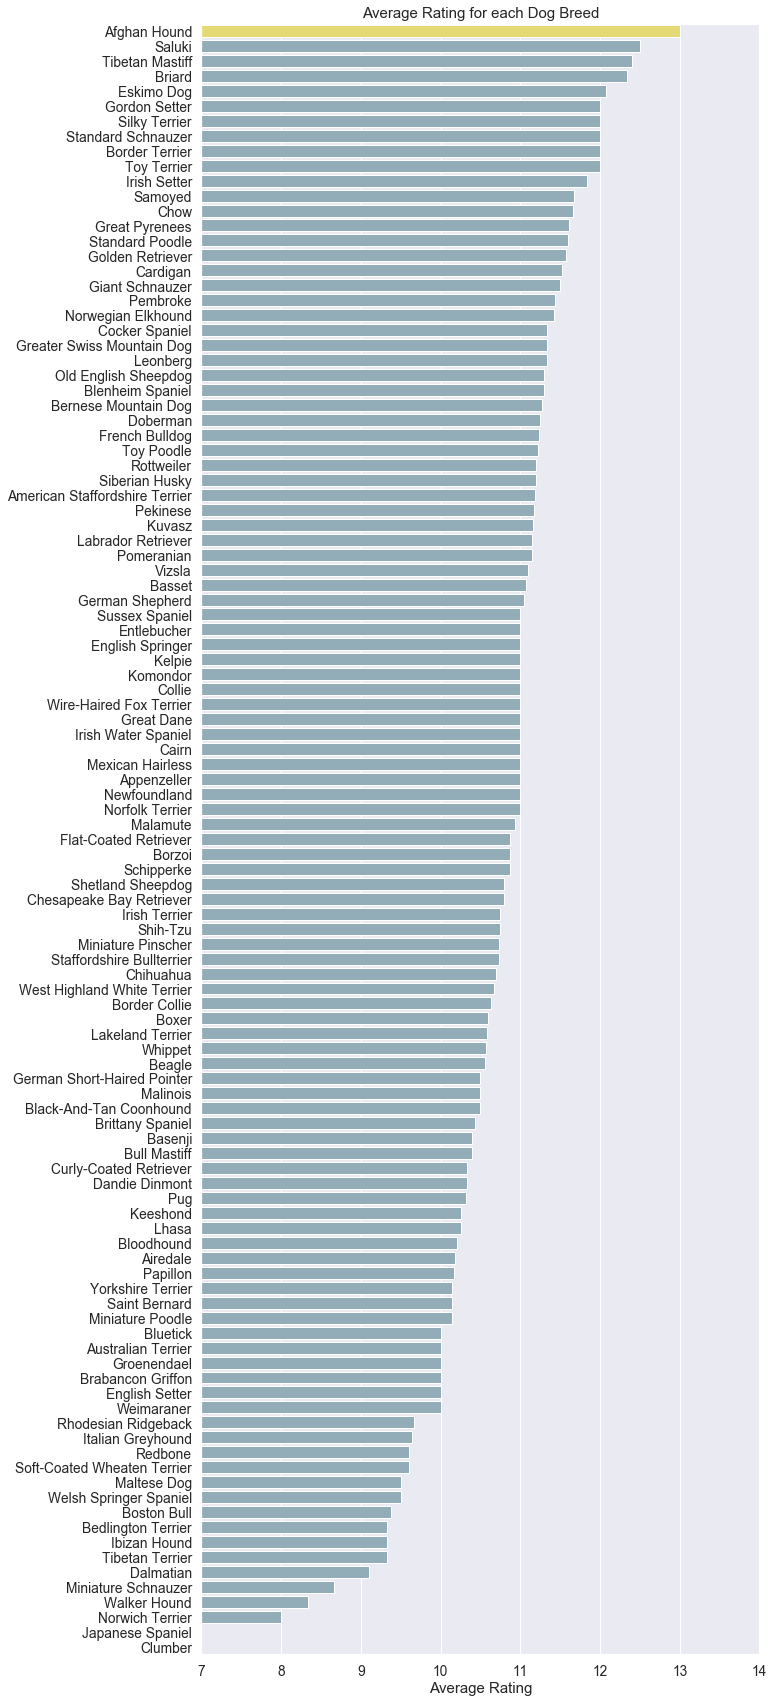

In [651]:
# axis values
x_axis = list(breed)
y_axis = [i.title() for i in breed.index]

# plot bar chart
plt.figure(figsize=[10,30])
plt.xlim(7,14)
plt.xlabel('Average Rating')
plt.title('Average Rating for each Dog Breed')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

#### Answer:

**Afghan Hound** dogs recieved the highest ratings with an average rating of 13, followed by **Saluki** with an average rating of 12.5 and Tibetan Mastiff with an average rating of 12.4

#### Q2 : Which dog breed recieved the highest favorite count on average?


In [652]:
# groups the dataset by dog breeds and computes the average favorite count for each group
breed_fav = tweet_merge_clean.groupby('breed_pred')['favorite_count'].mean()

# filters out dog breed that appear less than 10 times
breed_fav = breed_fav[tweet_merge_clean['breed_pred'].value_counts() > 0].sort_values(ascending=False)
breed_fav

breed_pred
Saluki                         24060.000000
Standard Poodle                20484.200000
French Bulldog                 17828.680000
Giant Schnauzer                17314.500000
Afghan Hound                   17305.000000
Black-And-Tan Coonhound        17012.000000
Flat-Coated Retriever          16791.625000
Mexican Hairless               15959.666667
Leonberg                       14934.333333
Eskimo Dog                     14896.928571
English Springer               14091.500000
Cardigan                       13867.882353
Irish Water Spaniel            13651.000000
Great Pyrenees                 13580.384615
Norwegian Elkhound             12234.285714
Basset                         12232.230769
Samoyed                        12184.700000
Border Terrier                 12017.166667
Bloodhound                     11980.200000
Labrador Retriever             11925.946237
Bedlington Terrier             11906.666667
Cocker Spaniel                 11633.333333
Newfoundland         

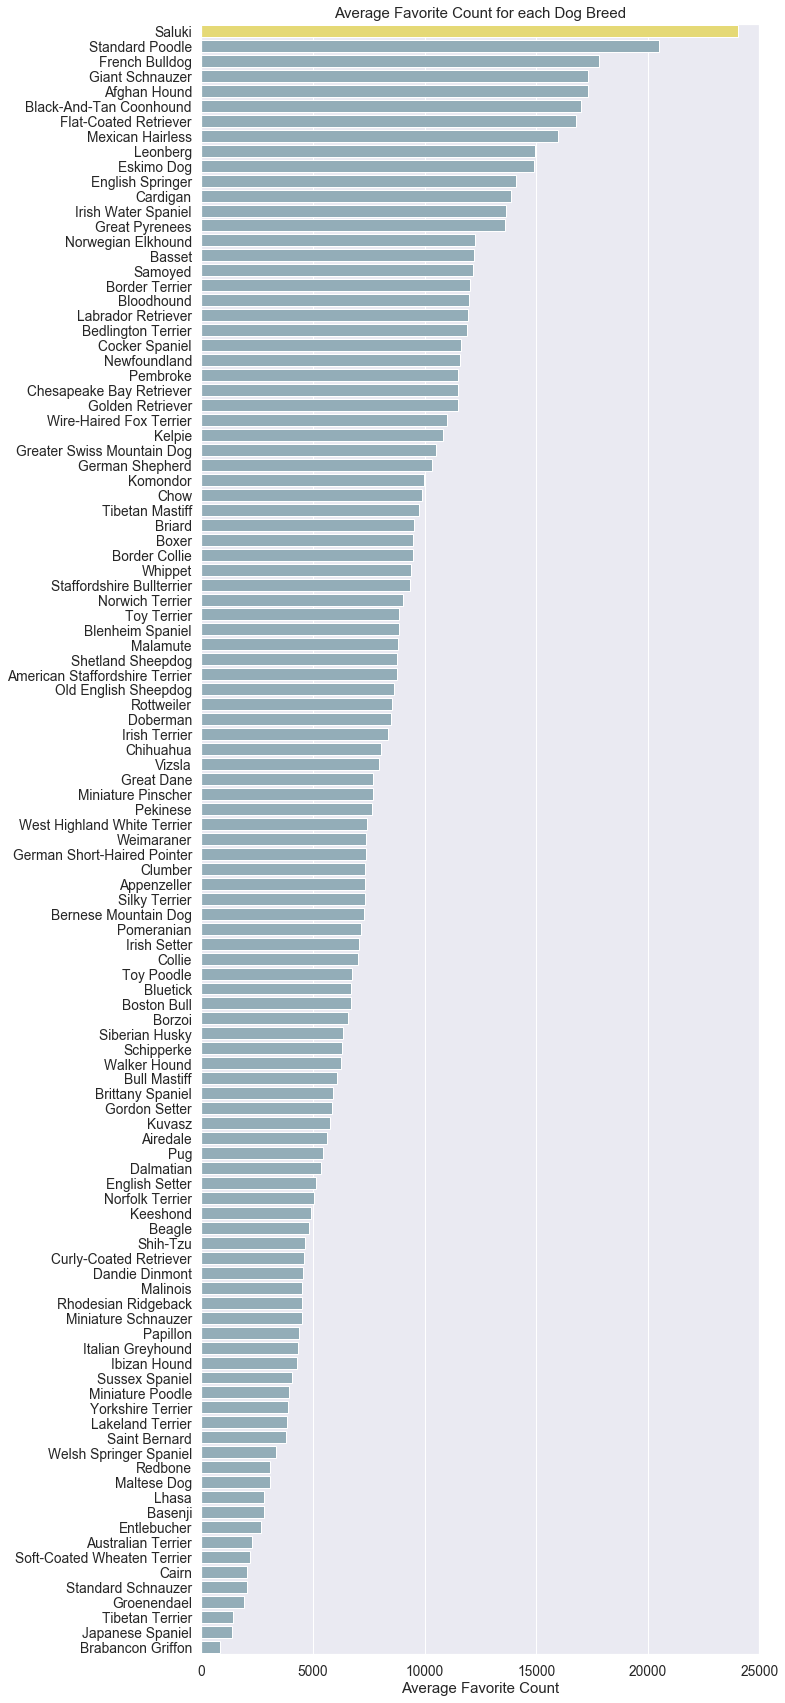

In [653]:
# define axis values
x_axis = list(breed_fav)
y_axis = [i.title() for i in breed_fav.index]

# plot the bar chart
plt.figure(figsize=[10,30])
plt.xlim(0, 25000)
plt.xlabel('Average Favorite Count')
plt.title('Average Favorite Count for each Dog Breed')
colors = ['#8dafbe' if (x < max(x_axis)) else '#f8e863' for x in x_axis]
ax = sns.barplot(x=x_axis, y=y_axis, label=y_axis, color="b", palette=colors)
plt.show();

#### Answer:

Regarding the popularity of dog breeds, **Saluki** have scored the highest between all dog breeds with an average favorite count of 24060 per tweet, while they were 2nd in the average ratings. The second most popular dog breed on WeRateDogs is the **Standard Poodle** with an average favorite counnt of 20484.2 per tweet, but were placed 15th on the average rating chart.